<a href="https://colab.research.google.com/github/anandkgupt/Machine-Learning-Lab/blob/main/Boosting_Techniques_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theoretical

1. What is Boosting in Machine Learning?
Boosting is an ensemble method that builds models sequentially, where each model tries to correct the errors of the previous one to improve overall performance.

2. How does Boosting differ from Bagging?
Boosting trains models sequentially to reduce bias, while Bagging trains models in parallel to reduce variance.

3. What is the key idea behind AdaBoost?
AdaBoost assigns higher weights to misclassified samples so the next learner focuses more on difficult cases.

4. Explain the working of AdaBoost with an example
AdaBoost starts with equal weights for all data points. After each weak learner (e.g., stump), it increases weights for wrongly classified points. Final prediction is a weighted vote of all learners.

5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting builds models to minimize a loss function using gradients, while AdaBoost adjusts weights based on errors. Gradient Boosting is more flexible with loss functions.

6. What is the loss function in Gradient Boosting?
It depends on the problem: Mean Squared Error for regression, Log Loss for classification.

7. How does XGBoost improve over traditional Gradient Boosting?
XGBoost adds regularization, parallel processing, tree pruning, and missing value handling for better speed and accuracy.

8. What is the difference between XGBoost and CatBoost?
CatBoost handles categorical variables natively, reducing preprocessing. It also combats overfitting with ordered boosting.

9. What are some real-world applications of Boosting techniques?
Fraud detection, credit scoring, ranking in search engines, click-through rate prediction, and medical diagnosis.

10. How does regularization help in XGBoost?
It prevents overfitting by penalizing complex models using L1 (Lasso) and L2 (Ridge) regularization.

11. What are some hyperparameters to tune in Gradient Boosting models?
Learning rate, number of trees, max depth, subsample rate, and regularization terms (lambda, alpha).

12. What is the concept of Feature Importance in Boosting?
Feature importance shows which variables contributed most to model accuracy, often based on split gain or frequency.

13. Why is CatBoost efficient for categorical data?
CatBoost converts categorical variables using target-based encoding with permutation, avoiding overfitting and reducing preprocessing.


**Practical**

In [2]:
#Train an AdaBoost Classifier on a sample dataset and print model accuracy4
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.865

In [3]:
# Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

# Generate a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.3, random_state=42)

# Split into train and test sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train AdaBoost Regressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_reg.fit(X_train_r, y_train_r)

# Predict and evaluate MAE
y_pred_r = ada_reg.predict(X_test_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
mae

72.01764931562033

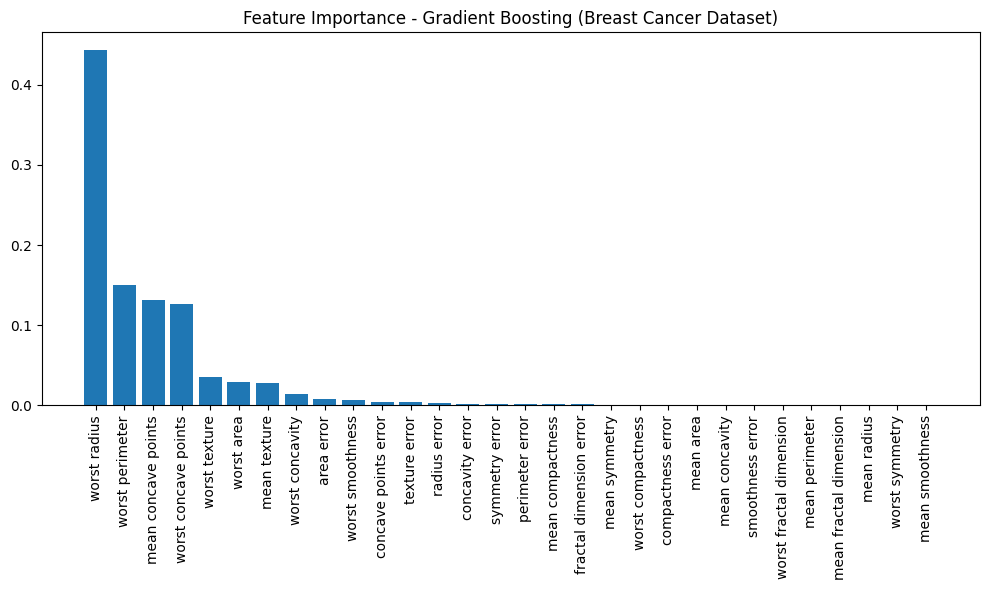

In [6]:
# Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target
feature_names = data.feature_names

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_bc, y_bc)

# Get feature importances
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Gradient Boosting (Breast Cancer Dataset)")
plt.bar(range(X_bc.shape[1]), importances[indices], align="center")
plt.xticks(range(X_bc.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [7]:
#Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Reuse the synthetic regression dataset
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_r, y_train_r)

# Predict and evaluate R-squared score
y_pred_gbr = gbr.predict(X_test_r)
r2 = r2_score(y_test_r, y_pred_gbr)
r2


0.9200113719158823

In [8]:
#Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Train XGBoost Classifier on the same dataset used earlier (make_classification)
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

# Accuracy of XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Train Gradient Boosting Classifier for comparison
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

# Accuracy of Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_pred)

xgb_accuracy, gb_accuracy


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:10:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.895, 0.91)

In [12]:
#Train a CatBoost Classifier and evaluate using F1-Score
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Train CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Predict and evaluate using F1-Score
cat_pred = cat_clf.predict(X_test)
f1 = f1_score(y_test, cat_pred)
f1




ModuleNotFoundError: No module named 'catboost'

In [13]:
#Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train_r, y_train_r)

# Predict and evaluate using MSE
y_pred_xgb = xgb_reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_xgb)
mse


6073.45165220066

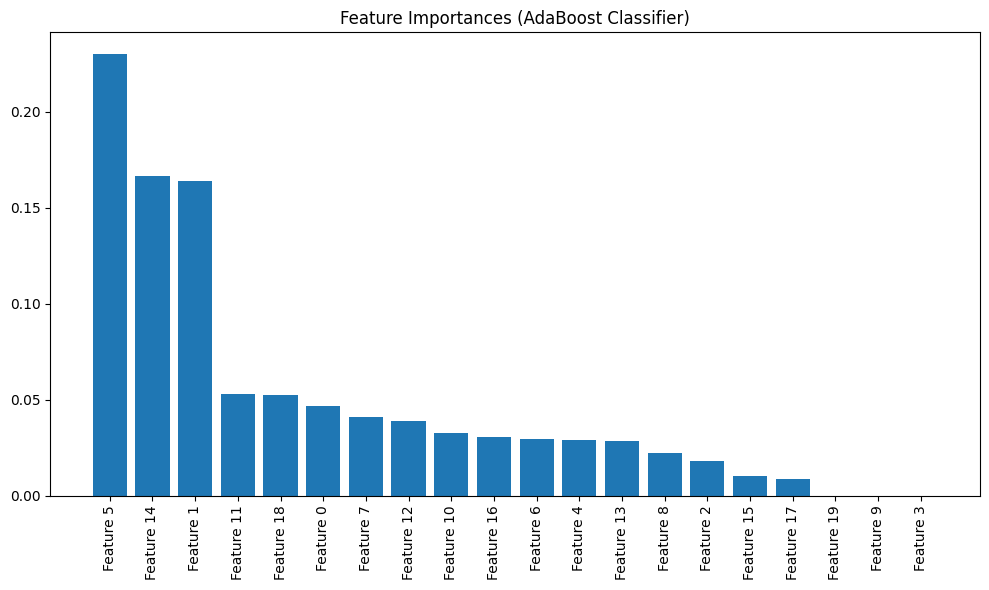

In [14]:
#Train an AdaBoost Classifier and visualize feature importance
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost Classifier
ab_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_clf.fit(X_train, y_train)

# Get feature importances
importances = ab_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (AdaBoost Classifier)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


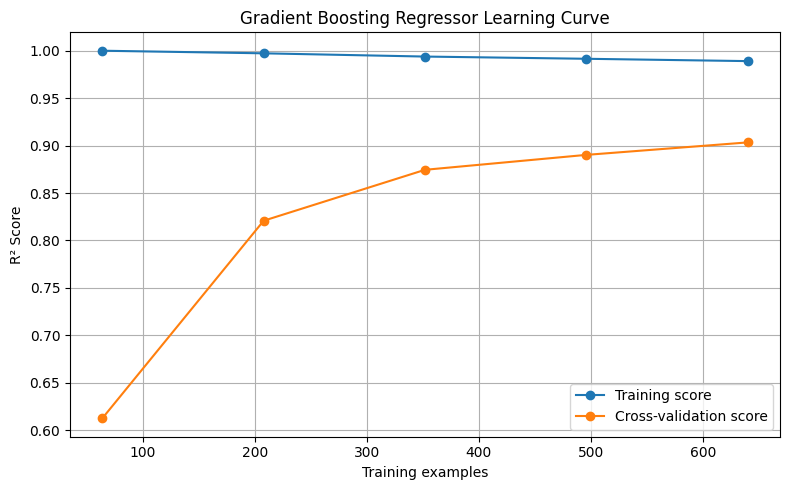

In [15]:
# Train a Gradient Boosting Regressor and plot learning curves
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Use a smaller sample if dataset is large to avoid memory issues
X_sample, y_sample = X_train_r[:1000], y_train_r[:1000]

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_sample, y_sample, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# Compute average scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title("Gradient Boosting Regressor Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

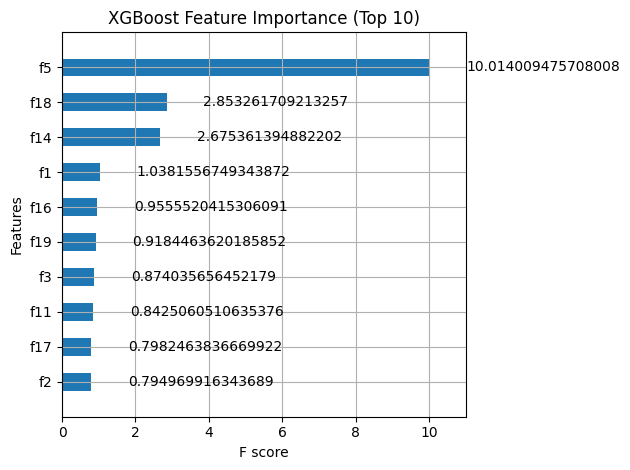

In [16]:
#Train an XGBoost Classifier and visualize feature importance
# Re-import necessary packages after kernel reset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Recreate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_clf, max_num_features=10, importance_type='gain', height=0.5)
plt.title("XGBoost Feature Importance (Top 10)")
plt.tight_layout()
plt.show()


In [17]:
#Train a CatBoost Classifier and plot the confusion matrix
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("CatBoost Classifier Confusion Matrix")
plt.show()


ModuleNotFoundError: No module named 'catboost'

In [18]:
# Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Try different numbers of estimators
n_estimators_list = [10, 50, 100, 200]
accuracy_results = {}

for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[n] = accuracy

accuracy_results


{10: 0.86, 50: 0.875, 100: 0.865, 200: 0.865}

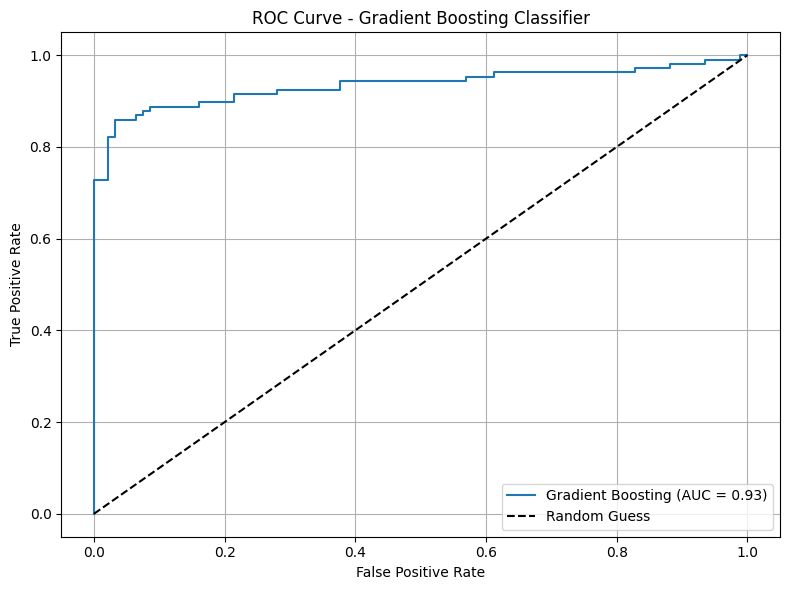

In [19]:
#Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict probabilities
y_scores = gb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create dataset
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1]
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Mean Squared Error (MSE):", mse)


Best Learning Rate: 0.1
Mean Squared Error (MSE): 3878.038908874049


In [22]:
#Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Generate imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train CatBoostClassifier without class weights
model_no_weights = CatBoostClassifier(verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)
report_no_weights = classification_report(y_test, y_pred_no_weights, output_dict=True)

# Train CatBoostClassifier with class weights
class_weights = {0: 1.0, 1: 10.0}  # Emphasize minority class
model_weights = CatBoostClassifier(class_weights=class_weights, verbose=0, random_state=42)
model_weights.fit(X_train, y_train)
y_pred_weights = model_weights.predict(X_test)
report_weights = classification_report(y_test, y_pred_weights, output_dict=True)

report_no_weights, report_weights



ModuleNotFoundError: No module named 'catboost'

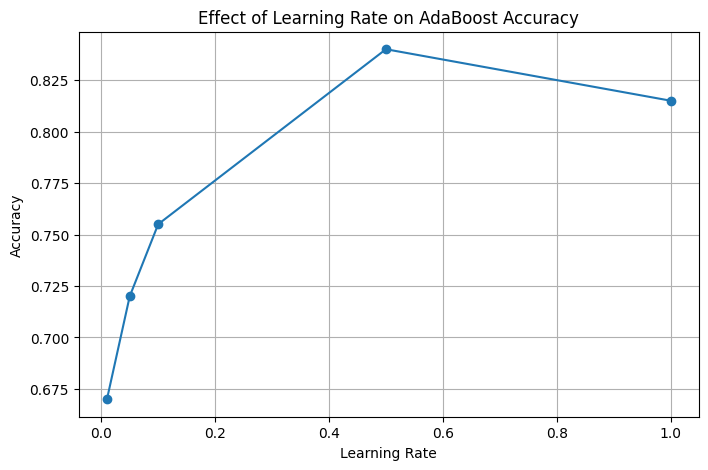

In [23]:
# Train an AdaBoost Classifier and analyze the effect of different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
accuracies = []

# Train and evaluate AdaBoost with different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot learning rate vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Effect of Learning Rate on AdaBoost Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [24]:
#Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load the Iris dataset for multi-class classification
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for log-loss evaluation
y_pred_proba = model.predict_proba(X_test)

# Compute log-loss
logloss_score = log_loss(y_test, y_pred_proba)
logloss_score


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:44:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.009289027880442384